In [1]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_diabetes
from synthcity.plugins import Plugins

eval_plugin = "privbayes"

In [2]:
# Load dataset
X, y = load_diabetes(return_X_y=True, as_frame=True)
X["target"] = y

X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [3]:
# Train the generator
from synthcity.plugins import Plugins

syn_model = Plugins().get(eval_plugin)

syn_model.fit(X)

In [4]:
# Generate new samples

syn_model.generate(count = 10)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,-0.052738,0.050680,-0.028840,0.021872,-0.040096,0.017162,0.085456,0.108111,-0.023645,-0.001078,141.0
1,0.016281,0.050680,0.111276,-0.049280,0.126395,-0.050478,0.100183,0.036154,-0.054544,-0.034215,25.0
2,-0.103593,-0.044642,-0.046085,-0.061904,-0.035968,0.047224,-0.072854,0.036154,0.066048,0.048628,248.0
3,-0.089063,-0.044642,0.114509,-0.056166,0.053469,-0.070833,-0.002903,0.185234,-0.023645,-0.017646,94.0
4,-0.052738,-0.044642,0.027206,-0.057314,-0.040096,-0.007577,-0.076536,-0.001116,-0.038459,0.106617,90.0
5,-0.052738,0.050680,-0.066563,-0.108957,-0.075870,-0.094632,-0.061809,-0.039493,-0.023645,0.052770,55.0
6,-0.107226,-0.044642,-0.046085,-0.005671,0.010815,-0.000061,-0.072854,0.036154,-0.019197,-0.034215,174.0
7,0.012648,-0.044642,0.036907,-0.061904,-0.030464,0.011838,0.085456,0.080804,-0.029528,-0.034215,195.0
8,-0.107226,0.050680,-0.059019,0.043677,0.019070,-0.010395,-0.006584,-0.001116,0.054724,-0.104630,264.0
9,0.038076,-0.044642,-0.066563,-0.007966,-0.035968,0.047224,0.033914,-0.008127,-0.004220,0.119043,109.0


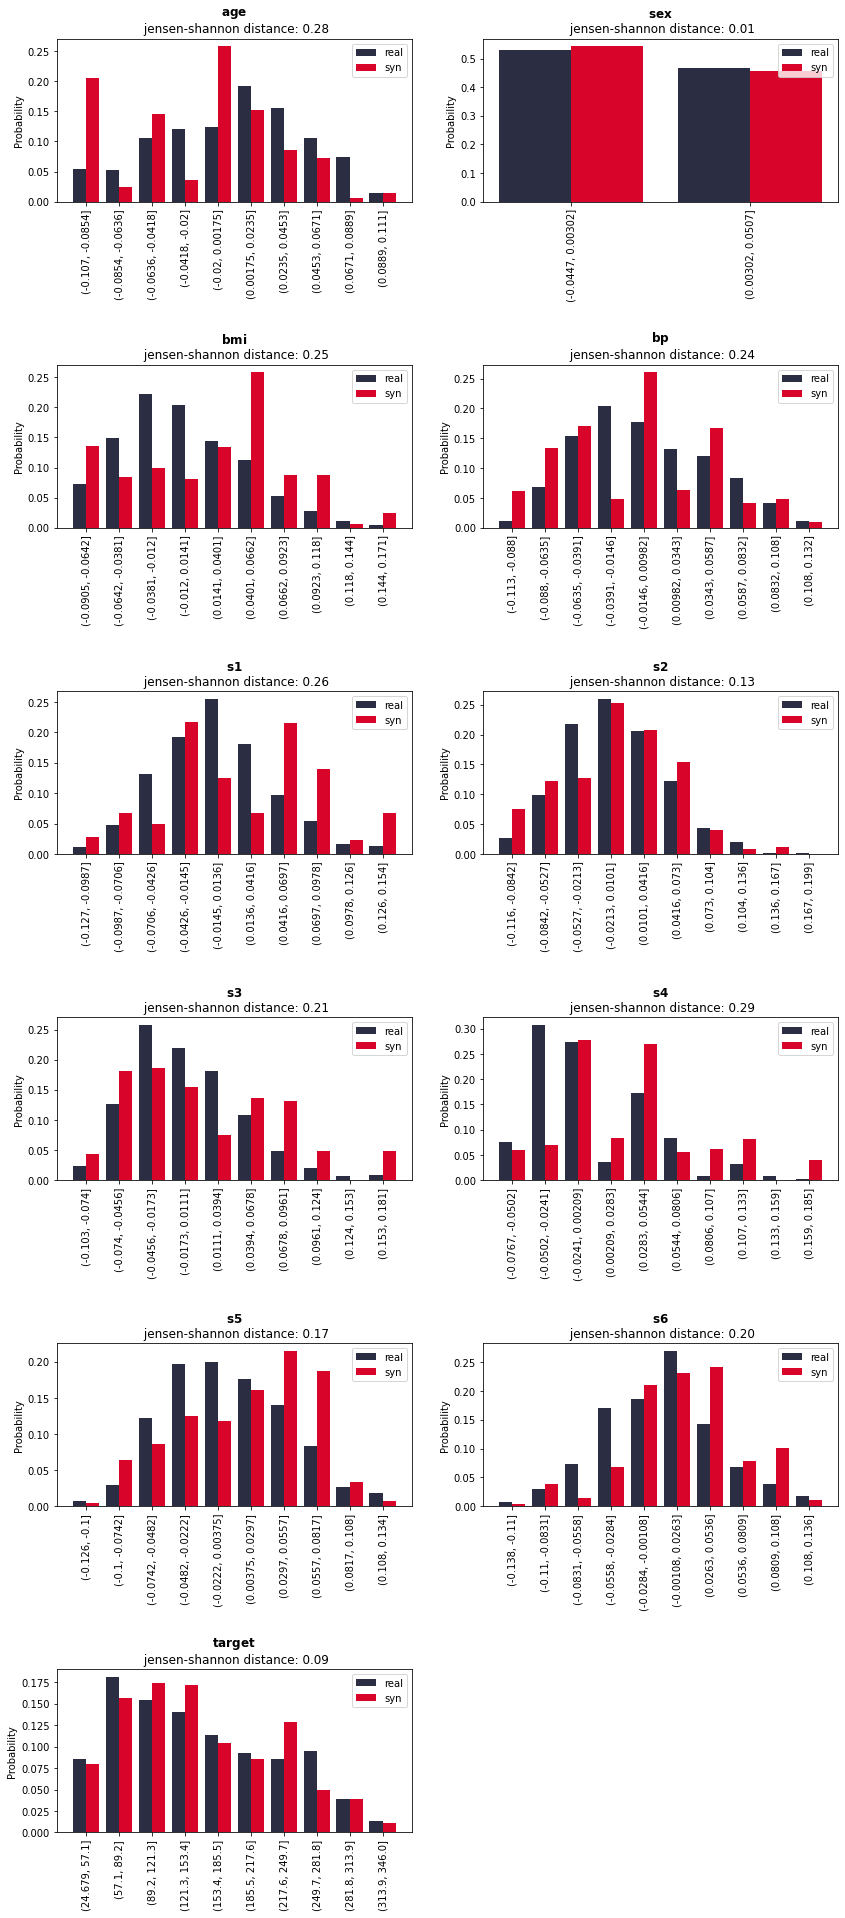

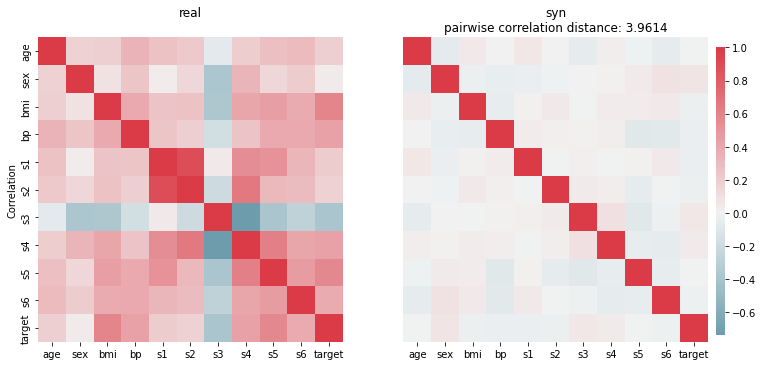

In [5]:
import matplotlib.pyplot as plt

syn_model.plot(plt, X)

plt.show()

In [6]:
# Benchmark
from synthcity.benchmark import Benchmarks

score = Benchmarks.evaluate(
    [eval_plugin],
    X,
    sensitive_columns = ["sex"],
    repeats = 3,
)

In [7]:
Benchmarks.print(score)


Plugin : privbayes


,min,max,mean,stddev,median,iqr,rounds,errors,durations
sanity.data_mismatch_score,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3,0,0.00
sanity.common_rows_proportion,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3,0,0.01
sanity.nearest_syn_neighbor_distance,0.077230,0.159524,0.129406,0.037041,0.151465,0.041147,3,0,0.01
sanity.inlier_probability,0.692308,0.882353,0.770739,0.081056,0.737557,0.095023,3,0,0.01
sanity.outlier_probability,0.002262,0.013575,0.008296,0.004649,0.009050,0.005656,3,0,0.01
statistical.marginal.jensenshannon_distance,0.170805,0.198859,0.184965,0.011454,0.185230,0.014027,3,0,0.17
statistical.marginal.chi_squared_test,0.722978,0.900349,0.812846,0.072431,0.815209,0.088685,3,0,0.02
statistical.joint.feature_correlation,3.857833,3.946526,3.910703,0.038163,3.927750,0.044347,3,0,0.13
statistical.marginal.inverse_cdf_distance,0.157688,0.171940,0.162467,0.006699,0.157772,0.007126,3,0,4.11
statistical.marginal.inverse_kl_divergence,0.846613,0.863188,0.854739,0.006770,0.854417,0.008287,3,0,0.03
